In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("house_price_regression_dataset.csv")
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [4]:
import math

def plot_all_histograms(df, title_prefix=""):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"{title_prefix}{col}")
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

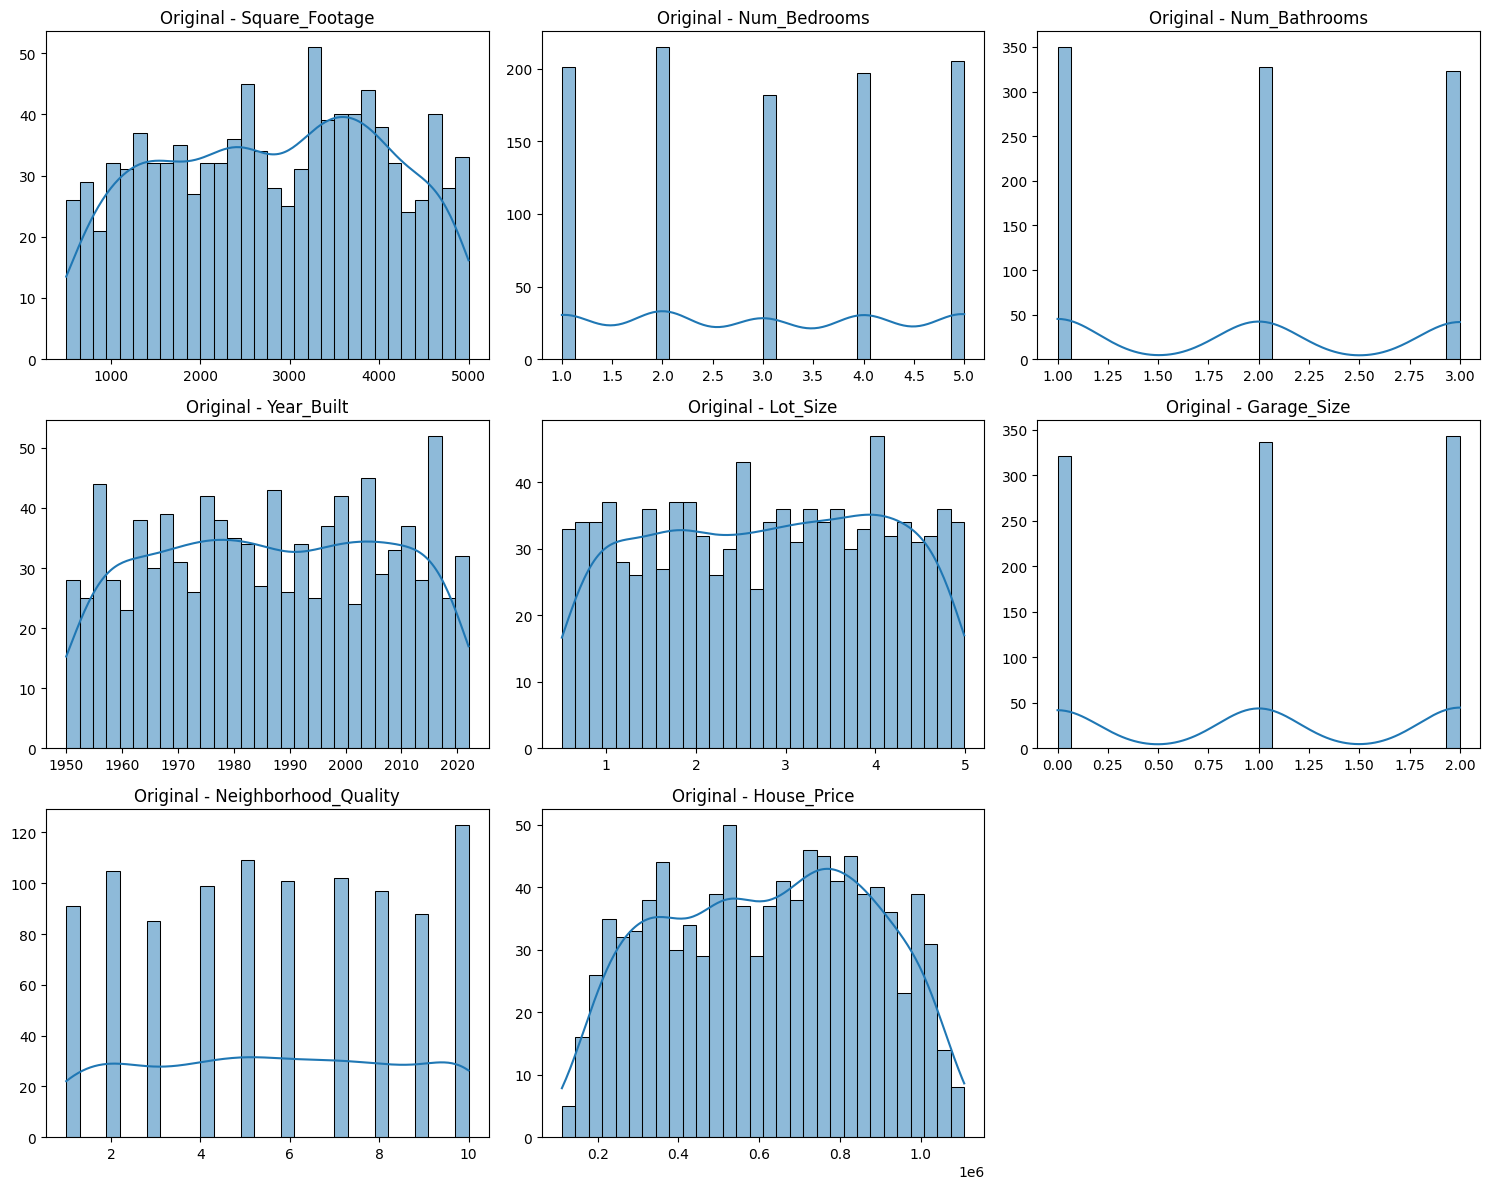

In [5]:
plot_all_histograms(df, title_prefix="Original - ")

In [6]:
from sklearn.preprocessing import PowerTransformer
X = df.drop('House_Price', axis=1)
y = df["House_Price"]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
pt_X = PowerTransformer(method="yeo-johnson")

X_train_transformed = pt_X.fit_transform(X_train)
X_test_transformed = pt_X.transform(X_test)

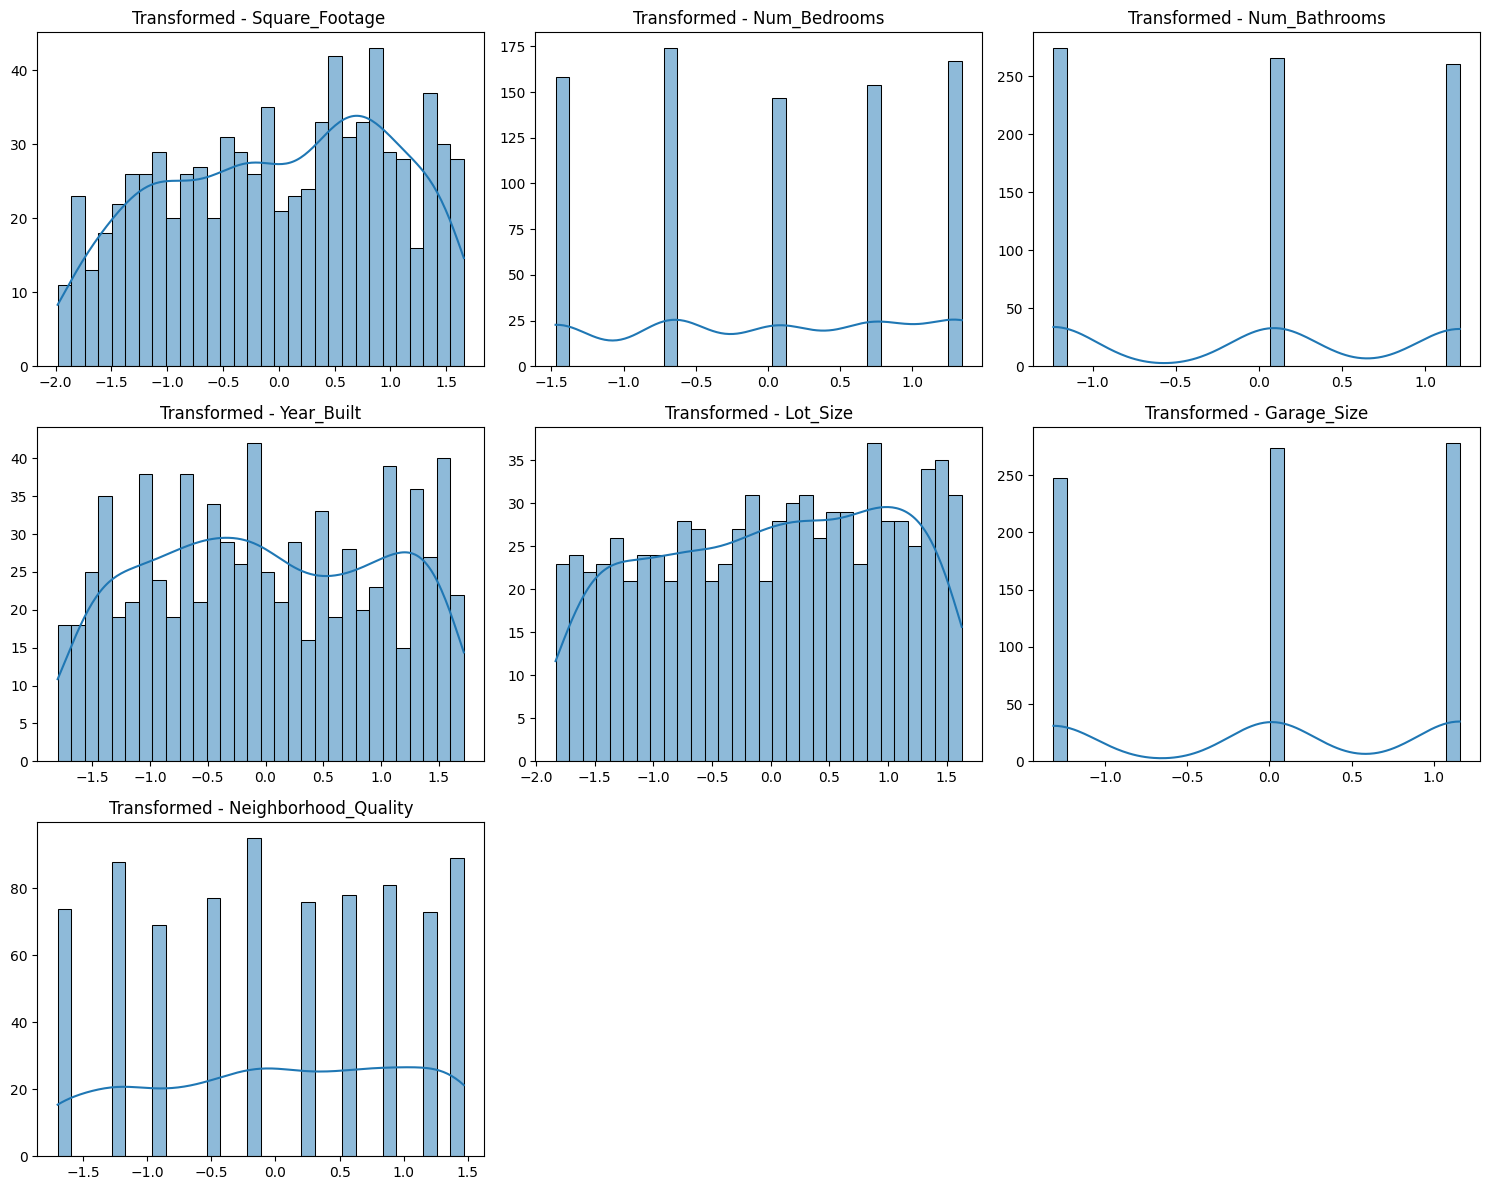

In [10]:
column_names = ['Square_Footage ', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Lot_Size', 'Garage_Size', 'Neighborhood_Quality']
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns = column_names)
plot_all_histograms(X_train_transformed_df, title_prefix="Transformed - ")

In [11]:
from scipy.stats import boxcox
y_train_transformed, lambda_y = boxcox(y_train)

In [12]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [14]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "Adaboost Regressor" : AdaBoostRegressor(),
    "Gradient Boost Regressor" : GradientBoostingRegressor(),
    "XGBoost Regressor" : XGBRegressor()
}

In [15]:
def inverse_boxcox(y, lambda_):
    if lambda_ == 0:
        return np.exp(y)
    else:
        return np.power(y * lambda_ + 1, 1 / lambda_)

In [16]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_transformed, y_train_transformed)

    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)

    y_pred_train_original = inverse_boxcox(y_train_pred, lambda_y)
    y_pred_test_original = inverse_boxcox(y_test_pred, lambda_y)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_pred_train_original)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_pred_test_original)

    print(list(models.keys())[i])
    print("Model performance for Training Set")
    print("Root Mean Squared Error: ", model_train_rmse)
    print("Mean Absolute Error: ", model_train_mae)
    print("R2 Score: ", model_train_r2)

    print("-----------------------------------")
    
    print("Model performance for Test Set")
    print("Root Mean Squared Error: ", model_test_rmse)
    print("Mean Absolute Error: ", model_test_mae)
    print("R2 Score: ", model_test_r2)

    print("-----------------------------------")
    print("\n")

Linear Regression
Model performance for Training Set
Root Mean Squared Error:  10437.10064092891
Mean Absolute Error:  8328.443937730435
R2 Score:  0.9983142230414666
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  10180.820715363127
Mean Absolute Error:  8102.61890954298
R2 Score:  0.9983356963748149
-----------------------------------


Lasso
Model performance for Training Set
Root Mean Squared Error:  10436.377874278558
Mean Absolute Error:  8328.134744169536
R2 Score:  0.9983144565126613
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  10176.01297947004
Mean Absolute Error:  8098.922408225273
R2 Score:  0.9983372678872104
-----------------------------------


Ridge
Model performance for Training Set
Root Mean Squared Error:  10451.724030254507
Mean Absolute Error:  8334.051907892383
R2 Score:  0.9983094958584315
-----------------------------------
Model performance for Test Set
Root Mean Square